### This is an explanation about noise. Types of noise:
<ol>
<li>Perlin Noise (1983)</li>
<li>Worley Noise (1996)</li>
<li>Simplex Noise(2001)</li>
</ol>

#### Useful links:
* http://web.archive.org/web/20160530124230/http://freespace.virgin.net/hugo.elias/models/m_perlin.htm
* http://staffwww.itn.liu.se/~stegu/simplexnoise/simplexnoise.pdf
* https://www.rhythmiccanvas.com/research/papers/worley.pdf

# conda install -c conda-forge noise

In [1]:
import matplotlib.pyplot as plt
import math
import noise
import random

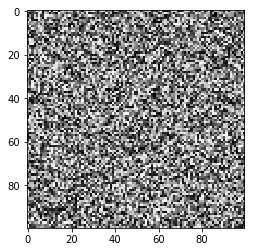

In [2]:
from PIL import Image
import matplotlib.cm as cm

fig1, ax = plt.subplots()

height = 100
width = 100


grid = []

for x in range(0, width):
    row = []
    for y in range(0, height):
        
        r = random.random()
        color = [r, r, r]
        row.append(color)
    grid.append(row)

ax.imshow(grid, cmap='viridis')

# newvalue = low2 + (value - low1) * (high2 - low2) / (high1 - low1)

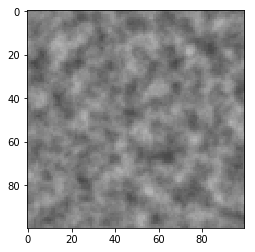

In [3]:
fig1, ax = plt.subplots()

height = 100
width = 100


grid = []

shape = (1024,1024)
scale = 10
octaves = 6
persistence = 0.5
lacunarity = 2.0

for x in range(0, width):
    row = []
    for y in range(0, height):
        
        r = noise.pnoise2(x/scale, 
                        y/scale, 
                        octaves=octaves, 
                        persistence=persistence, 
                        lacunarity=lacunarity, 
                        repeatx=1024, 
                        repeaty=1024, 
                        base=0)
        
        r_remapped = 0.5*(r+1)
        color = [r_remapped, r_remapped, r_remapped]
        row.append(color)
    grid.append(row)

ax.imshow(grid, cmap='viridis')

# newvalue = low2 + (value - low1) * (high2 - low2) / (high1 - low1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


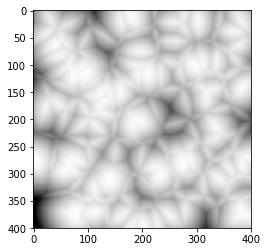

In [35]:
def map(value, low1, high1, low2, high2):
    
    return low2 + (value - low1) * (high2 - low2) / (high1 - low1)

def dist(x1,y1,x2,y2):
    
    return (x2 - x1)**2 + (y2 - y1)**2

grid = []
num_points = 100
points = []
height = 400
width = 400

fig1, ax2 = plt.subplots()


for i in range(num_points):
    
    points.append( (random.randint(0,width), random.randint(0,height)) )

#print (points)    

for x in range(0, width):
    row = []
    for y in range(0, height):
        distances = []
        
        for i in range(num_points):
            
            v = points[i]
            d = dist(x, y, v[0], v[1])
            
            distances.append(d)
        
        #sort distances
        distances.sort()
        color = map(distances[1], 0, 5000, 1, 0)
        col = [ color, color, color ]
        row.append(col)
    grid.append(row)

    
ax2.imshow(grid, cmap='viridis')

# why do we care?

In [5]:
#noise flow field

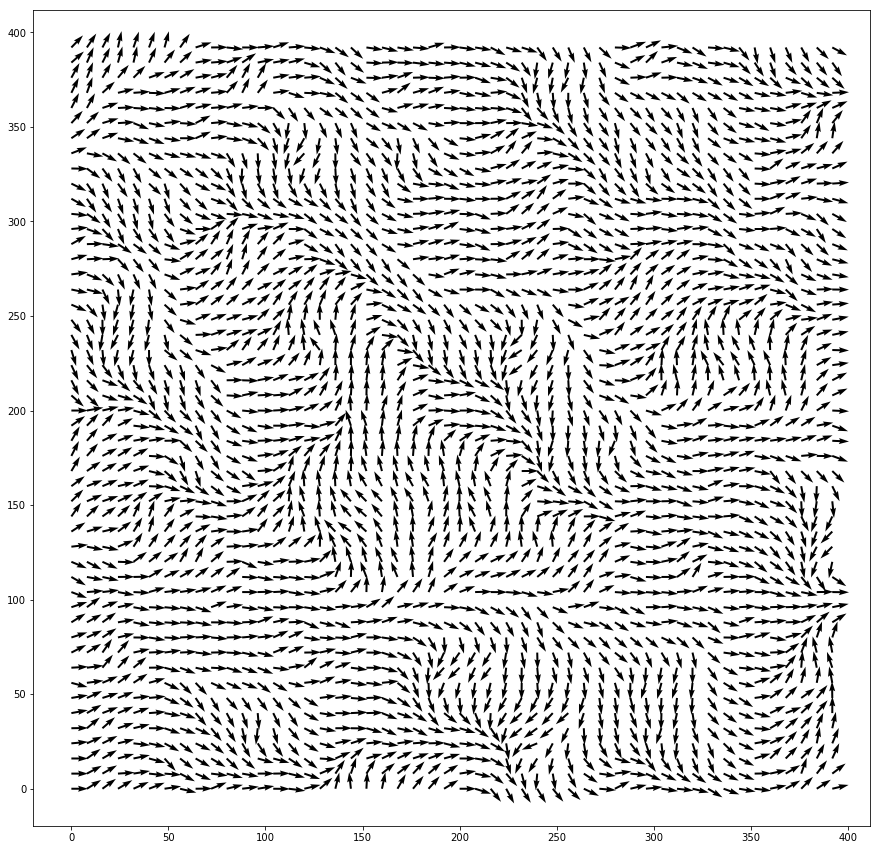

In [27]:
import numpy as np
fig1, ax = plt.subplots(1,0,figsize=(15,15))

grid = []

shape = (1024,1024)
pscale = 100
octaves = 6
persistence = 0.5
lacunarity = 2.0
X = []
Y = []
angles = []

for x in range(0, width, 8):
    #row = []
    for y in range(0, height, 8):
        
        
        X.append(x)
        Y.append(y)
        angle = noise.pnoise2(x/pscale, 
                        y/pscale, 
                        octaves=octaves, 
                        persistence=persistence, 
                        lacunarity=lacunarity, 
                        repeatx=1024, 
                        repeaty=1024, 
                        base=0)
        
        angles.append(map(angle,-0.5,0.5,-math.pi,math.pi))

U = []
V = []

    
for a in angles:
    
    u =  math.cos(a)
    v =  math.sin(a)

    U.append(u)
    V.append(v)

plt.quiver(X,Y,U,V,scale = 50)
plt.show()